# Unsupervised Learning

1. Select `att1` and `att2` from **train.csv** and **test.csv** data. This step will result a new data
frame or a table with size of 10,000 rows and 2 columns. Perform clustering using at
least 3 algorithms (K-Means Clustering, Hierarchical Clustering, and DBSCAN) to
cluster that new data frame.
Submit your .ipynb file that contain the process of your clustering!
2. Assume that the dataset you are working is the employee data, whether
`att1` is satisfaction level (the higher the satisfaction level, the more satisfy a person
does in his employment)
`att2` is evaluation result (the higher the evaluation result, the better/harder a person
works in the company).

Can you name the clusters that you have just made?

In [1]:
# Import the libraries and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
pd.options.display.max_columns = None
pd.options.display.max_rows = 15

data_train = pd.read_csv(r'dataset/train.csv')
data_test = pd.read_csv(r'dataset/test.csv')

display(data_train.sample(5))
display(data_test.sample(5))

print('Train data shape {}'.format(data_train.shape))
print('Test data shape {}'.format(data_test.shape))

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,att8d,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c,att10
3151,0.79,1.00,5,257,6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2083,0.66,0.99,5,244,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4594,0.28,0.94,6,167,3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7596,0.74,0.87,3,155,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4143,0.40,0.53,2,151,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1


,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,att8d,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c
1244,0.88,0.67,5,264,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1495,0.78,0.98,5,252,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
635,0.35,0.50,5,227,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
482,0.64,0.78,5,148,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
549,1.00,0.71,4,216,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


Train data shape (8000, 21)
Test data shape (2000, 20)


In [2]:
data_train = data_train[['att1', 'att2']]
data_test = data_test[['att1', 'att2']]

In [3]:
data = data_train.append(data_test)
X = np.array(data)

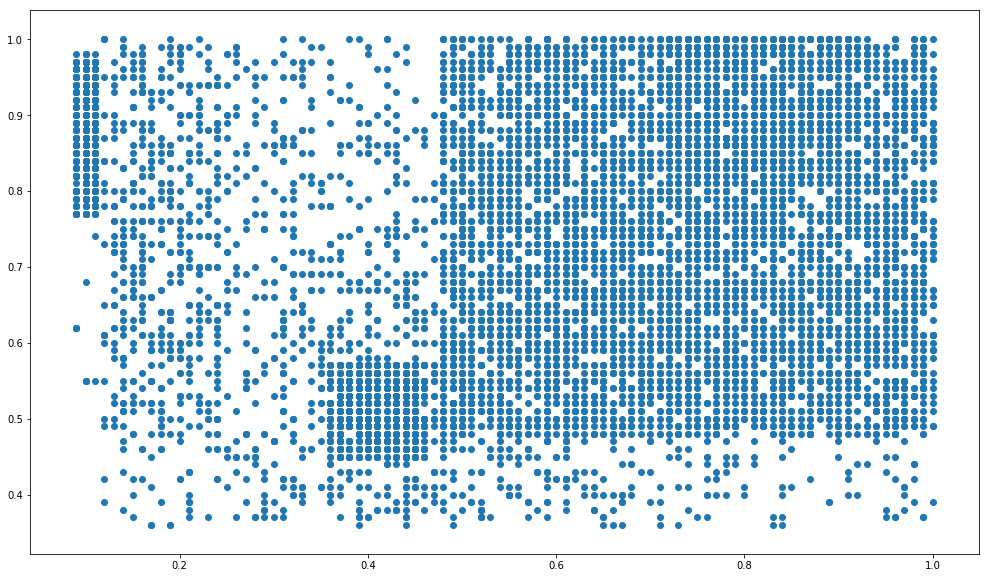

In [4]:
plt.figure(figsize=(17, 10))
plt.scatter(data['att1'], data['att2'])
plt.show()

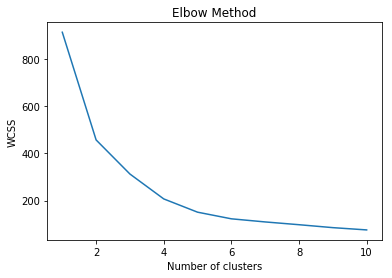

In [5]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From above result we then determine that the optimum number of cluster is 5.

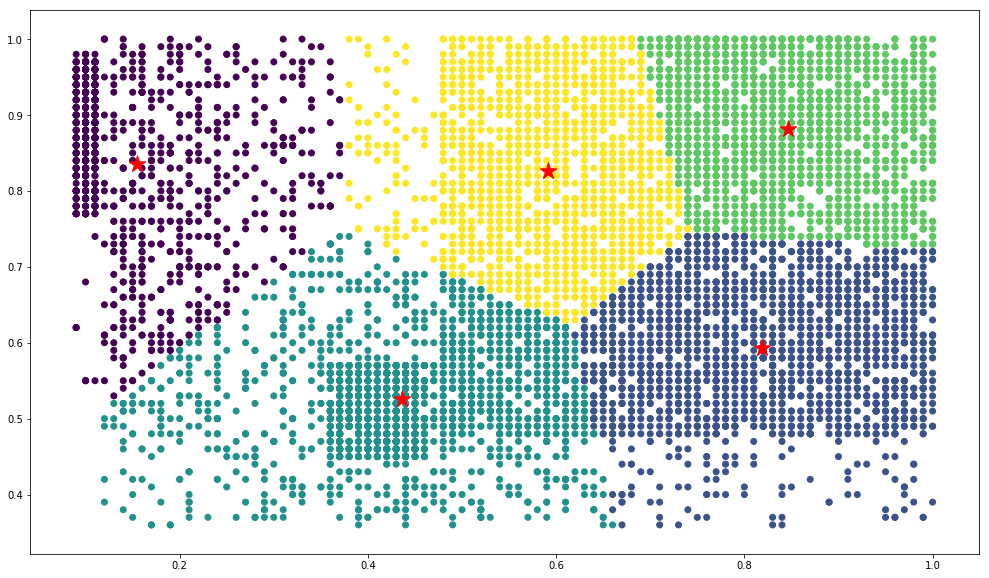

In [6]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pred = kmeans.fit_predict(data)

plt.figure(figsize=(17, 10))
plt.scatter(data['att1'], data['att2'], c=kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*')
plt.show()

The x axis from above result shows the `att1` which are the satisfaction level of employees, meanwhile the y axis shows the `att2` which are the performance level of employees.
The clusters are:
- purple, the cluster of employees that have high satisfaction level and low performance level
- tea green, the cluster of employees that have low satisfaction level and low performance level
- yellow, the cluster of employees that have medium satisfaction level and medium performance level
- blue, the cluster of employees that have low satisfaction level and high performance level
- green, the cluster of employees that have high satisfaction level and high performance level

On real life case of course we want to avoid low level on any of the features, so maybe we can treat the employees from each clusters differently based on their needs. 

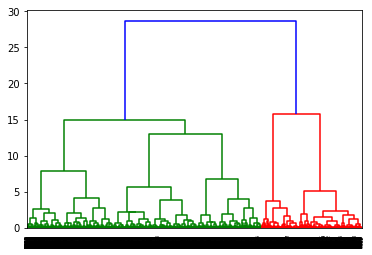

In [7]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))

In [8]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(data)
labels = model.labels_

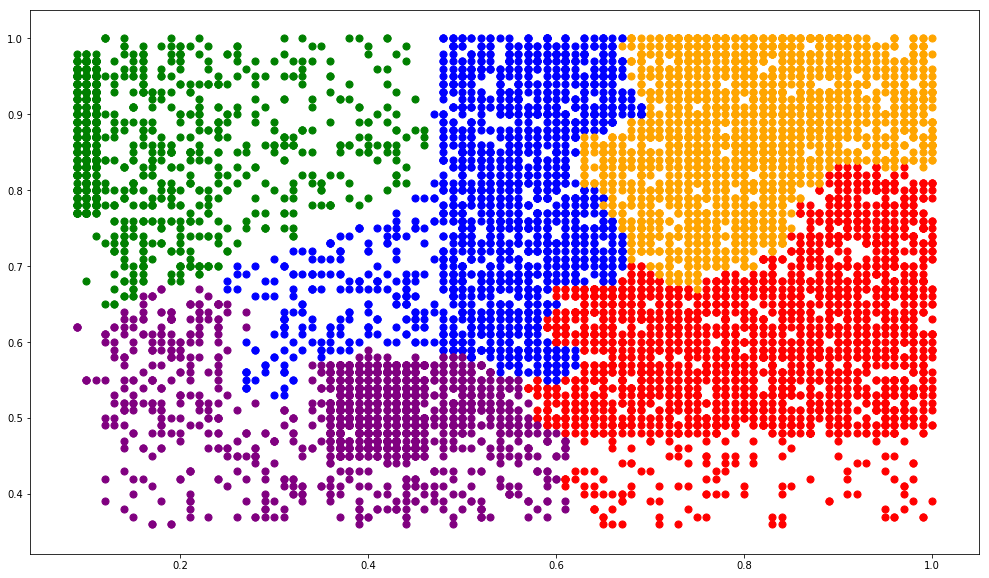

In [9]:
plt.figure(figsize=(17, 10))
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

In [10]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import seaborn as sns
sns.set()

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

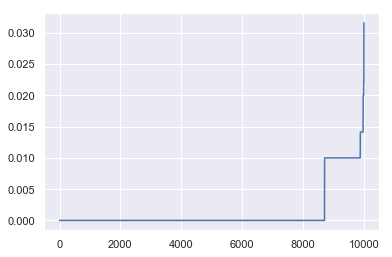

In [11]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [12]:
m = DBSCAN(eps=0.05, min_samples=100)
m.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=100, n_jobs=None, p=None)

In [13]:
clusters = m.labels_

In [14]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

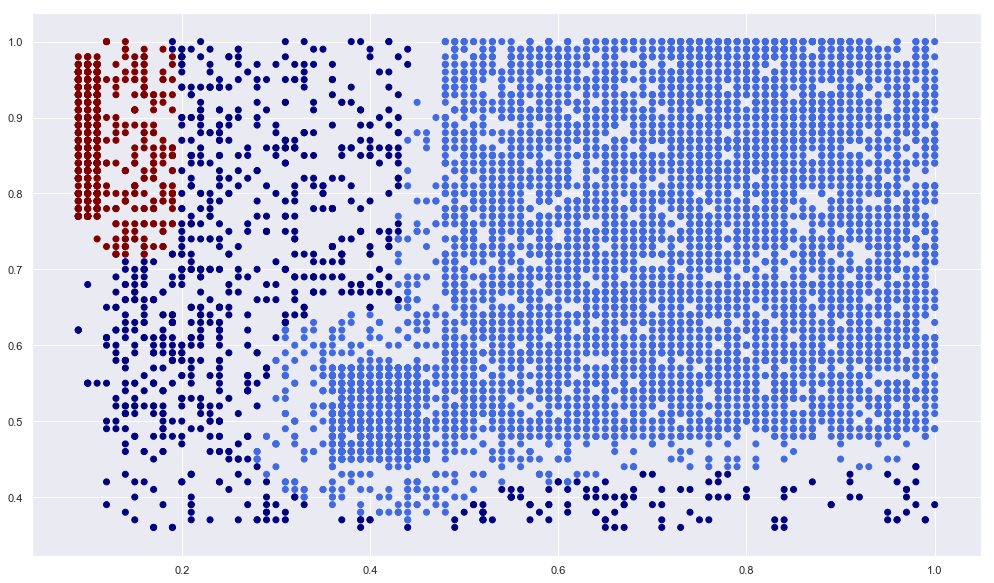

In [15]:
plt.figure(figsize=(17, 10))
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))
plt.show()